## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문과정

### 교과목명 : 통계
- 평가일 : 22.2.4
- 성명 :  이재우
- 점수 :  90

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [161]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [162]:
score_mat = np.array(df.mathematics)

# 평균값
m = np.mean(score_mat)
print('평균값: ',m)

# 중앙값
mid = np.percentile(score_mat,50)
print('중앙값: ',mid)

# 최빈값
freq_1 = pd.Series(score_mat).mode()[0]
print('최빈값: ',freq_1)

# 분산
var = np.var(score_mat).round(4)
print('분산: ',var)

# 표준편차
std = np.std(score_mat).round(4)
print('표준편차: ',std)

# 범위
min_val = np.min(score_mat)
max_val = np.max(score_mat)
print('범위: ',max_val - min_val)

# IQR
q1 = np.percentile(score_mat,25)
q3 = np.percentile(score_mat,75)
print('IQR: ',q3-q1)

평균값:  78.88
중앙값:  80.0
최빈값:  77
분산:  69.3856
표준편차:  8.3298
범위:  37
IQR:  8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [163]:
score = df.english
type(score)

pandas.core.series.Series

In [164]:
score_arr = np.array(score)
print(type(score_arr))

m = np.mean(score_arr)
s = np.std(score_arr)
score_arr = (score_arr-m)/s
#표준화된 배열
print(np.mean(score_arr).round(4),np.var(score_arr).round(4))

print(score_arr[:5])

<class 'numpy.ndarray'>
-0.0 1.0
[-1.68843012  1.09469645 -0.24532745 -1.79150888 -0.14224869]


Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

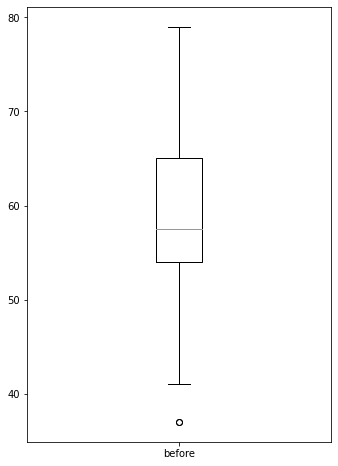

Int64Index([20, 35], dtype='int64', name='student number')


KeyError: "['english'] not found in axis"

In [246]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(121)
ax1.boxplot(score, labels = ['before'])
plt.show()
#이상치 하나 발견
score_new = pd.DataFrame(score)
q1 = np.percentile(score,25)
q3 = np.percentile(score,75)
iqr = q3-q1
c1 = score_new.english < q1 - 1.5*iqr
c2 = score_new.english > q3 + 1.5*iqr
print(score_new[c1|c2].index)
score_new.drop(score_new[c1 | c2],axis = 0,inplace=True)

ax2 = fig.add_subplot(122)
ax2.boxplot(score_new, labels = ['after'])
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [166]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [168]:
# scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
np.cov(scores_df.english,scores_df.mathematics).round(2)[0][1]

69.78

In [169]:
# scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
np.corrcoef(scores_df.english,scores_df.mathematics)[0][1].round(2)

0.82

Text(0, 0.5, 'mathematics')

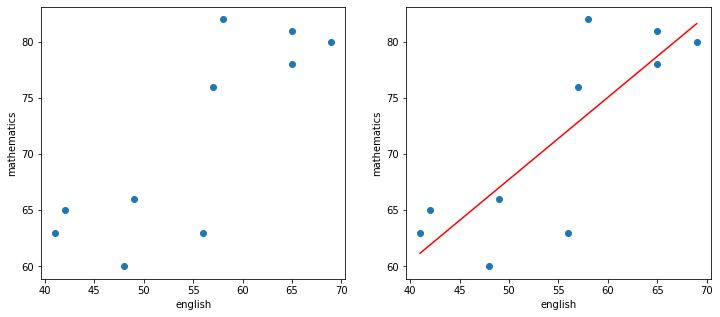

In [167]:
# 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력)
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(scores_df.english,scores_df.mathematics)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

poly_fit = np.polyfit(scores_df.english,scores_df.mathematics,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(np.min(scores_df.english),np.max(scores_df.english))
ys = poly_1d(xs)

ax2 = fig.add_subplot(122)
ax2.scatter(scores_df.english,scores_df.mathematics)
ax2.plot(xs,ys,color = 'red')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

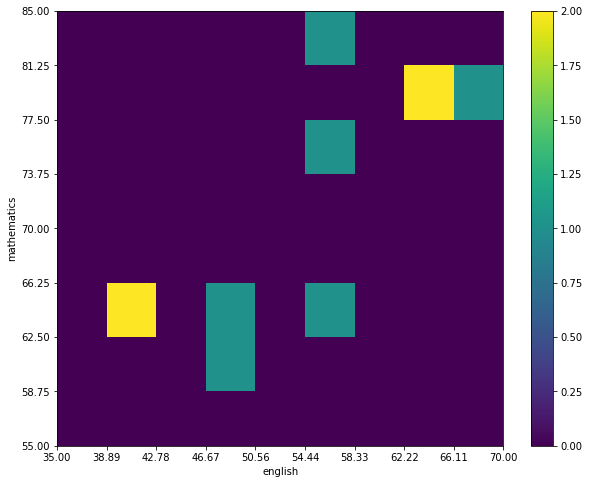

In [170]:
# 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)
fig =  plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(scores_df.english,scores_df.mathematics, bins = [9,8], range= [(35,70),(55,85)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax= ax)

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [171]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

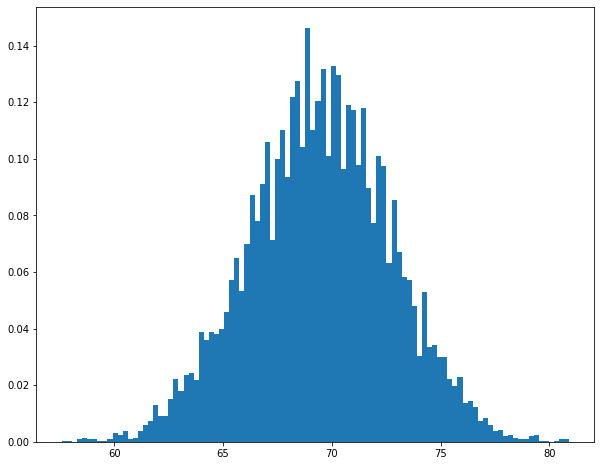

In [172]:
score_means = []
n = int(1e4)
for i in range(n):
    mean = np.mean(np.random.choice(scores,20))
    score_means.append(mean)
score_means = np.array(score_means)
plt.figure(figsize = (10,8))
plt.hist(score_means,bins = 100,density = True)
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [173]:
from scipy import stats
rv = stats.bernoulli(0.5)
rv.mean(), rv.var()

(0.5, 0.25)

Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [174]:
rv = stats.binom(10,0.5)
rv.mean(), rv.var()

(5.0, 2.5)

Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [175]:
rv = stats.poisson(2)
rv.mean(), rv.var()

(2.0, 2.0)

Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

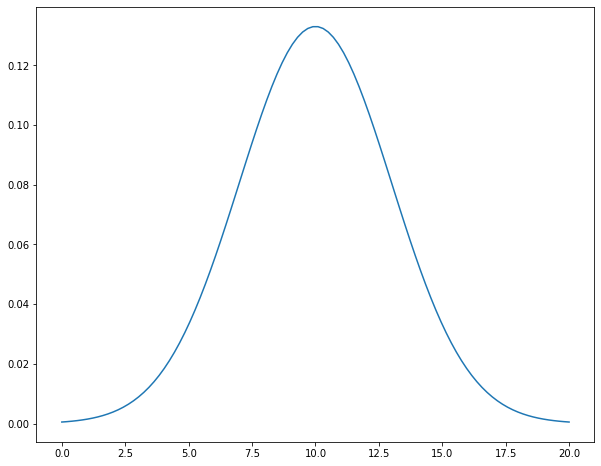

In [176]:
rv = stats.norm(10,3)
xs = np.linspace(0,20,100)

plt.figure(figsize = (10,8))
plt.plot(xs, rv.pdf(xs) , label = 'N(10,9)')
plt.show()

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

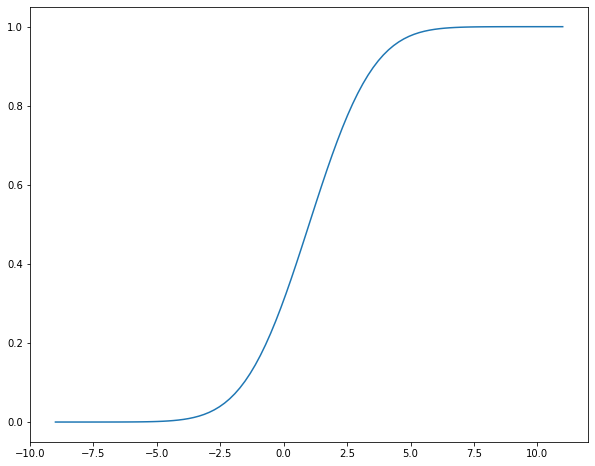

In [177]:
rv = stats.norm(1,2)
xs = np.linspace(-9,11,100)

plt.figure(figsize = (10,8))
plt.plot(xs, rv.cdf(xs) , label = 'N(1,2)의 cdf')
plt.show()

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [178]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./data/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [191]:
df2 = df1.copy()
df2.loc[df2['species']=='A',['species']] = 'C'
df2.loc[df2['species']=='C',['length']] *= 2
df2.loc[df2['species']=='B',['species']] = 'D'
df2.loc[df2['species']=='D',['length']] *= 3
display(df2)

df = pd.concat([df1,df2],axis = 0,ignore_index=True)
display(df)

groups = df.groupby('species')
groupA = groups.get_group('A')
print('그룹 A- 평균: ',groupA.length.mean(),'표준편차: ',groupA.length.std())

groupB = groups.get_group('B')
print('그룹 B- 평균: ',groupB.length.mean(),'표준편차: ',groupB.length.std())

groupC = groups.get_group('C')
print('그룹 C- 평균: ',groupC.length.mean(),'표준편차: ',groupC.length.std())

groupD = groups.get_group('D')
print('그룹 D- 평균: ',groupD.length.mean(),'표준편차: ',groupD.length.std())

,species,length
0,C,4
1,C,6
2,C,8
3,D,18
4,D,24
5,D,30


,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


그룹 A- 평균:  3.0 표준편차:  1.0
그룹 B- 평균:  8.0 표준편차:  2.0
그룹 C- 평균:  6.0 표준편차:  2.0
그룹 D- 평균:  24.0 표준편차:  6.0


Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [181]:
import pandas as pd
shoes = pd.read_csv("./data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [192]:
shoes1=shoes.copy()
shoes1 = pd.concat([shoes1,shoes1],axis = 0,ignore_index=True)
display(shoes1)
shoes_pivot = shoes1.pivot_table(values='sales',aggfunc='sum', index= 'store', columns = 'color')
shoes_pivot

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [195]:
titanic = pd.read_csv('data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='sex', ylabel='pclass'>

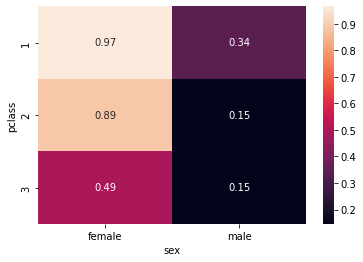

In [201]:
import seaborn as sns

pivot = titanic.pivot_table(index = 'pclass', columns = 'sex', values = 'survived',aggfunc = 'mean')
sns.heatmap(pivot,annot = True)

인사이트 : pclass의 등급이 높을수록 생존률이 높아지고, 남성보다 여성의 생존률이 높다.

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [211]:
rv = stats.norm(4,0.8)
sample_size = int(1e4)
n = 10
sample_means = np.zeros(n)

Xs_sample = rv.rvs((n,sample_size))
sample_means = np.mean(Xs_sample,axis = 0)
sample_means[:10]

array([4.12414746, 3.88646408, 4.27836245, 4.23886713, 4.2087212 ,
       4.08636839, 3.94405431, 4.0239991 , 4.34620003, 4.02448661])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

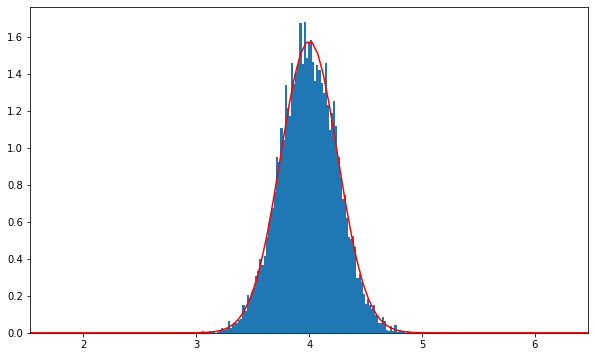

In [215]:
plt.figure(figsize = (10,6))
rv_true = stats.norm(4,0.8/np.sqrt(n))
xs = np.linspace(rv.isf(0.999),rv.isf(0.001),100)

plt.hist(sample_means,bins=100,density=True)

plt.plot(xs,rv_true.pdf(xs),color='red')
plt.xlim(rv.isf(0.999),rv.isf(0.001))
plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

2.9953 4.9884


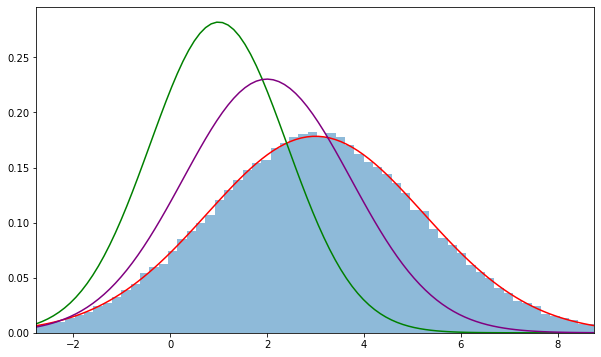

In [220]:
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e5)

X = rv1.rvs(sample_size)
Y = rv2.rvs(sample_size)

XY = X+Y
print(np.mean(XY).round(4),np.var(XY).round(4))

plt.figure(figsize = (10,6))

rv = stats.norm(3,np.sqrt(5))

xs = np.linspace(rv.isf(0.995),rv.isf(0.005),100)

plt.hist(XY,bins=100,density = True, alpha = 0.5)
plt.plot(xs,rv.pdf(xs),color = 'red')
plt.plot(xs,rv1.pdf(xs),color = 'green')
plt.plot(xs,rv2.pdf(xs),color = 'purple')
plt.xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()


Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

7.0076 7.0664


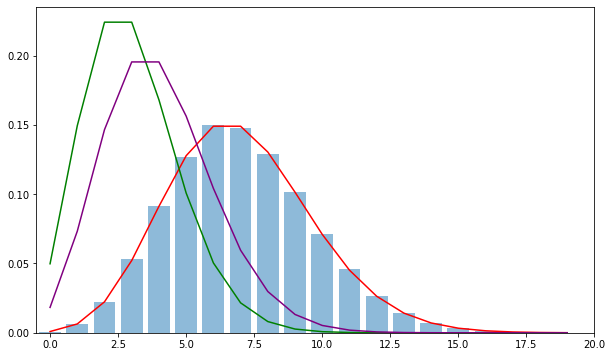

In [227]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e5)

X = rv1.rvs(sample_size)
Y = rv2.rvs(sample_size)

XY = X+Y
print(np.mean(XY).round(4),np.var(XY).round(4))

plt.figure(figsize = (10,6))

rv = stats.poisson(7)

xs = np.arange(20)

hist,_ = np.histogram(XY,bins=20,range=(0,20),density = True)

plt.bar(xs,hist, alpha = 0.5)
plt.plot(xs,rv.pmf(xs),color = 'red')
plt.plot(xs,rv1.pmf(xs),color = 'green')
plt.plot(xs,rv2.pmf(xs),color = 'purple')
plt.xlim(-0.5,20)
plt.show()


Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

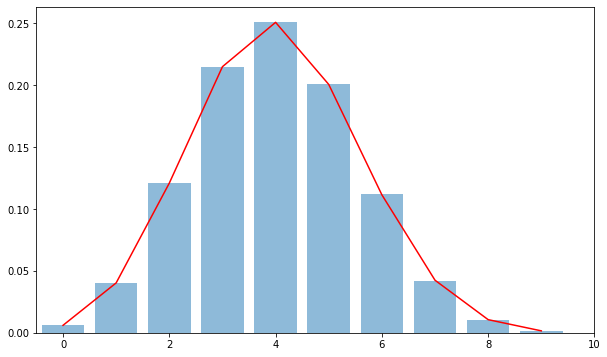

In [230]:
p = 0.4
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
sum_sample = np.sum(Xs_sample, axis = 0)

plt.figure(figsize = (10,6))

rv = stats.binom(10,p)

xs = np.arange(10)

hist,_ = np.histogram(sum_sample,bins=10,range=(0,10),density = True)

plt.bar(xs,hist, alpha = 0.5)
plt.plot(xs,rv.pmf(xs),color = 'red')
plt.xlim(-0.5,10)
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

In [232]:
lam = 3
rv = stats.poisson(lam)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample,axis = 0)

print(np.mean(sample_mean).round(4), np.var(sample_mean).round(4))

3.0 0.3006


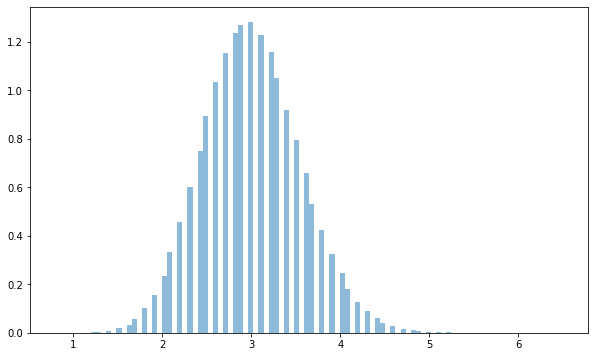

In [235]:
# 기대값과 분산이 다르므로 포아송 분포의 표본분포는 포아송 분포를 따르지 않는다


plt.figure(figsize = (10,6))

plt.hist(sample_mean, bins=100,density=True,alpha = 0.5)

plt.show()

중심극한정리는 확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 기대값이 $\mu$, 분산이 $\sigma^2$를 따를 때, n이 커짐에 따라 표본평균 $\bar{X}$는 정규분포 $N(\mu,\sigma^2/n)$에 가까워지는 이론이다. 따라서 포아송 분포의 표본분포도 sample의 수가 많아질수록 포아송 분포를 따르는 것이 아닌 정규분포를 따르게 된다

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [240]:
df = pd.read_csv('./data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [242]:
# 가설 : 유의 수준을 5%로 설정하고 모분산이 9임을 안다고 전제한다.

# 유의 수준에 따른 임계값 계산
rv = stats.norm(130,np.sqrt(9/14))
print(rv.isf(0.95).round(4))

# 검정통계량 계산 : 주어진 무게 데이터의 평균을 계산한다.
print(df['무게'].mean().round(4))

128.6812
128.4507


검정통계량이 임계값보다 작으므로 '무게의 평균이 130kg이다'라는 귀무가설은 기각되고 '무게의 평균은 130kg보다 작다'라는 결론에 이르게 된다.